In [30]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import linalg as LA
import os
from string import digits

# Find Path and Feelings of each Image
folder = 'jaffe/jaffe'
images_path = os.listdir(folder)
feelings = []
for i, p in enumerate(images_path):
    images_path[i] = os.path.join(folder, p)
    remove_digits = str.maketrans('', '', digits)
    feeling = p.split('.')[1].translate(remove_digits)
    feelings.append(feeling)

# Split data based on feelings.
data = pd.DataFrame({'path': images_path, 'feeling': feelings})
fear = data[data['feeling'].isin(['FE'])]
happy = data[data['feeling'].isin(['HA'])]
sad = data[data['feeling'].isin(['SA'])]
neutral = data[data['feeling'].isin(['NE'])]
surprised = data[data['feeling'].isin(['SU'])]
data.sample(5)

,path,feeling
143,C:\Users\Atlas\Projects\SPR\HW4\jaffe\NM.SA1.9...,SA
133,C:\Users\Atlas\Projects\SPR\HW4\jaffe\NM.DI3.1...,DI
111,C:\Users\Atlas\Projects\SPR\HW4\jaffe\NA.DI1.2...,DI
54,C:\Users\Atlas\Projects\SPR\HW4\jaffe\KM.HA2.5...,HA
132,C:\Users\Atlas\Projects\SPR\HW4\jaffe\NM.DI1.1...,DI


In [31]:
from sklearn.preprocessing import MinMaxScaler
import cv2
from matplotlib.pyplot import imshow
fe = []
ha = []
sa = []
ne = []
su = []
for i, row in data.iterrows():    
    im = Image.open(row['path']).convert('L').resize((64,64))
    im = np.array(im)
    feeling = row['feeling']
    if feeling == 'FE':
        fe.append(im)
    elif (feeling == 'HA'):
        ha.append(im)
    elif (feeling == 'SA'):
        sa.append(im)
    elif (feeling == 'NE'):
        ne.append(im)
    elif (feeling == 'SU'):
        su.append(im)

fe = np.array(fe)
ha = np.array(ha)
sa = np.array(sa)
ne = np.array(ne)
su = np.array(su)

all_images = np.concatenate((fe, ha, sa, ne, su))
all_images.shape

(123, 64, 64)

(64, 64, 123)


Text(0.5, 0.98, 'Happy faces')

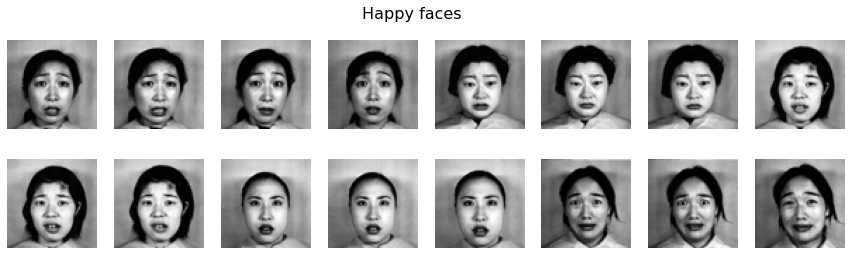

In [32]:
images = all_images
images = images.transpose(1,2,0)
images = images/255
print(images.shape)
fig = plt.figure(figsize=(15,4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(images[:,:,i],cmap = 'gray')
    plt.axis('off')
plt.suptitle('Happy faces', size = 16)

In [33]:
M = images.shape[2] # Number of samples
N = images.shape[0] # Dimension of data


# Normalization



(-0.5, 63.5, 63.5, -0.5)

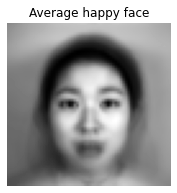

In [34]:
mean = np.mean(images, axis = 2)
plt.figure(figsize=(3,3))
plt.imshow(mean, cmap = 'gray')
plt.title('Average happy face')
plt.axis('off')

Text(0.5, 0.98, 'After subtracting average face')

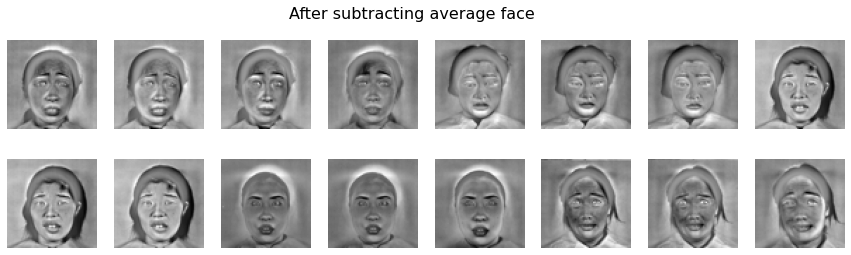

In [35]:
demeaned = images - mean[...,None] # Subtract average face from all faces.
fig = plt.figure(figsize=(15,4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(demeaned[:,:,i],cmap = 'gray')
    plt.axis('off')
plt.suptitle('After subtracting average face',size=16)

# Calclating EigenFaces

In [36]:
A = np.zeros((N*N, M)) #(65536, 31)
for i in range(M):
    A[:,i] = demeaned[:,:,i].flatten()

L = np.matmul(A.transpose(), A)
# L = np.matmul(A, A.transpose())
mu, v = LA.eig(L) # Find eig of A^TA
idx = mu.argsort()[::-1]
mu = mu[idx]
v = v[:,idx]
u = np.matmul(A, v) # Construct eigenvectors of AA^T

# Visualize some of the first principal components

Text(0.5, 0.98, 'Top 24 eigenfaces, from scratch')

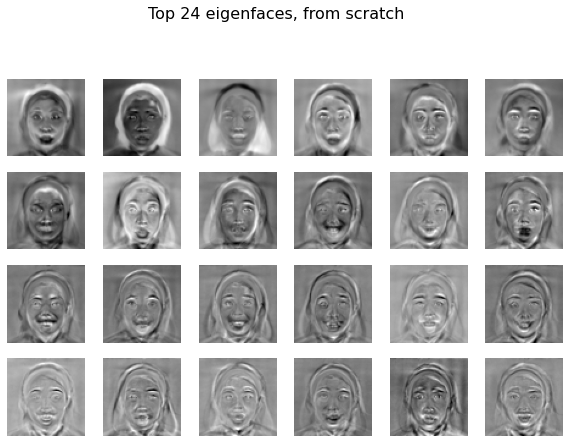

In [37]:
eigfaces = np.zeros((N,N,M))
for i in range(M):
    eigfaces[:,:,i] = u[:,i].reshape(N,N)
    
# Plot First 24 eigenfaces
fig = plt.figure(figsize=(10, 10))
for i in range(24):
    plt.subplot(6,6,i+1)
    plt.imshow(eigfaces[:,:,i],cmap = 'gray')
    plt.axis('off')
plt.suptitle('Top 24 eigenfaces, from scratch',size=16)

# Find cumulative variance of each principle component

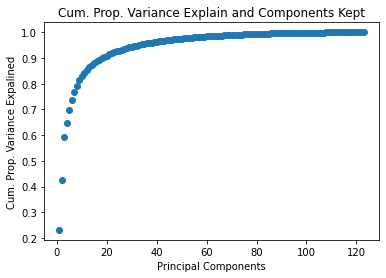

In [38]:
total_var = sum(mu)
cum_var = np.cumsum(mu)/total_var
# x-axis for number of principal components kept
num_comp = range(1,len(mu)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, cum_var)
plt.show()

# Visualize the reduced dataset using 2D and 3D plots

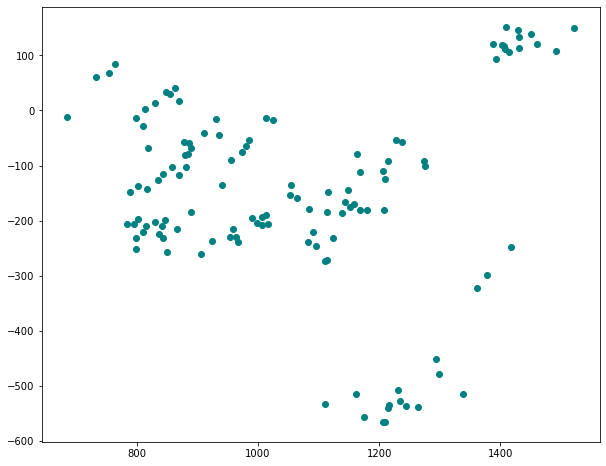

In [71]:
plt.rcParams["figure.figsize"] = (10, 8)

flatten_images = np.zeros((N*N, M)) #(65536, 31)
for i in range(M):
    flatten_images[:,i] = images[:,:,i].flatten()
num_components = 2
components = u[:, :num_components]
proj_data = (flatten_images.T @ components)
plt.scatter(proj_data[:, 0], proj_data[:,1], marker='o', color='teal')
plt.show()

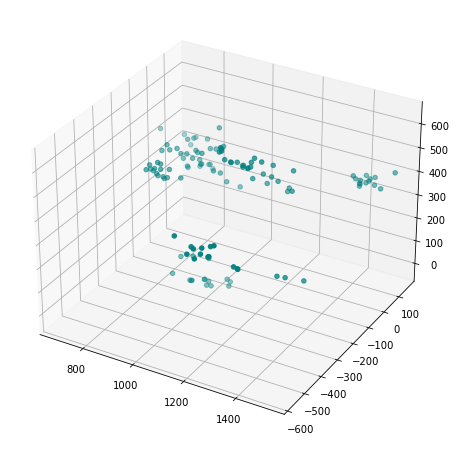

In [72]:
num_components = 3
components = u[:, :num_components]
proj_data = (flatten_images.T @ components)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj_data[:, 0], proj_data[:,1], proj_data[:,2], marker='o', color='teal')
plt.show()

# Show reconstructed images of each individual for K=1,40,120

Text(0.5, 0.98, 'Top 24 eigenfaces, from scratch')

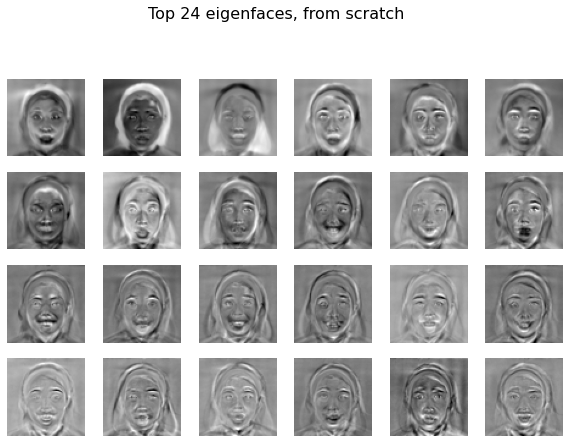

In [93]:
######## K=1 #########

flatten_images = np.zeros((N*N, M)) #(65536, 31)
for i in range(M):
    flatten_images[:,i] = images[:,:,i].flatten()
num_components = 1
components = u[:, :num_components]
projected_data = flatten_images.T @ components
reconstructed_data = (projected_data @ components.T).T

new_images = np.zeros((N,N,M))
for i in range(M):
    new_images[:,:,i] = reconstructed_data[:,i].reshape(N,N)
    
# Plot First 24 eigenfaces
fig = plt.figure(figsize=(10, 10))
for i in range(24):
    plt.subplot(6,6,i+1)
    plt.imshow(eigfaces[:,:,i],cmap = 'gray')
    plt.axis('off')
plt.suptitle('Top 24 eigenfaces, from scratch',size=16)

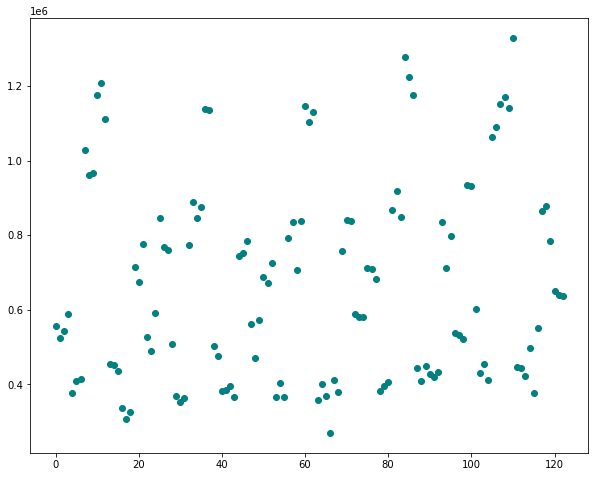

In [95]:
from sklearn.metrics import mean_squared_error
mse = []
for i in range(flatten_images.shape[1]):
    mse.append(mean_squared_error(flatten_images[:, i], reconstructed_data[:, i]))
plt.scatter(list(range(len(mse))), mse, marker='o', color='teal')
plt.show()    

Text(0.5, 0.98, 'Top 24 eigenfaces, from scratch')

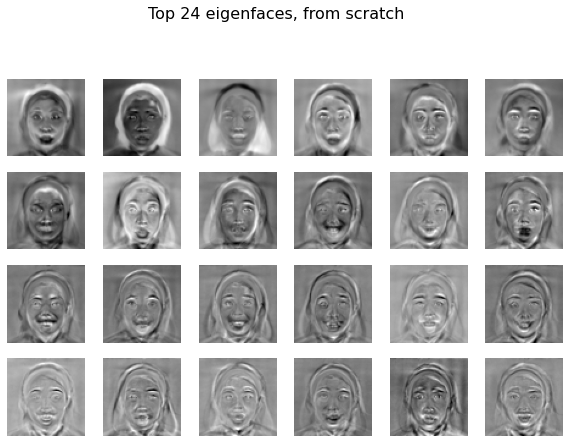

In [96]:
######## K=40 #########


flatten_images = np.zeros((N*N, M)) #(65536, 31)
for i in range(M):
    flatten_images[:,i] = images[:,:,i].flatten()
num_components = 40
components = u[:, :num_components]
projected_data = flatten_images.T @ components
reconstructed_data = (projected_data @ components.T).T

new_images = np.zeros((N,N,M))
for i in range(M):
    new_images[:,:,i] = reconstructed_data[:,i].reshape(N,N)
    
# Plot First 24 eigenfaces
fig = plt.figure(figsize=(10, 10))
for i in range(24):
    plt.subplot(6,6,i+1)
    plt.imshow(eigfaces[:,:,i],cmap = 'gray')
    plt.axis('off')
plt.suptitle('Top 24 eigenfaces, from scratch',size=16)

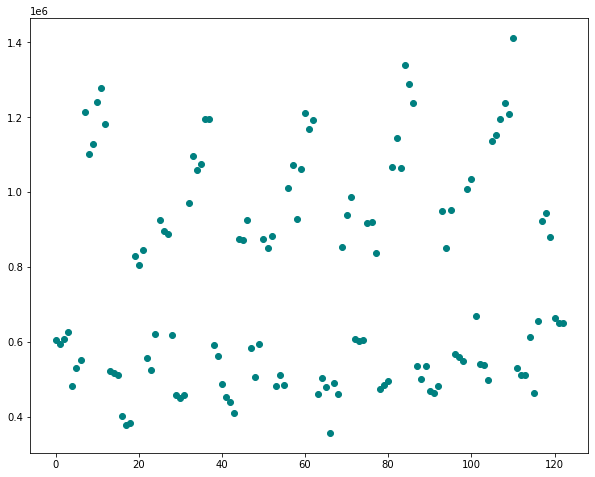

In [97]:
mse = []
for i in range(flatten_images.shape[1]):
    mse.append(mean_squared_error(flatten_images[:, i], reconstructed_data[:, i]))
plt.scatter(list(range(len(mse))), mse, marker='o', color='teal')
plt.show()    

Text(0.5, 0.98, 'Top 24 eigenfaces, from scratch')

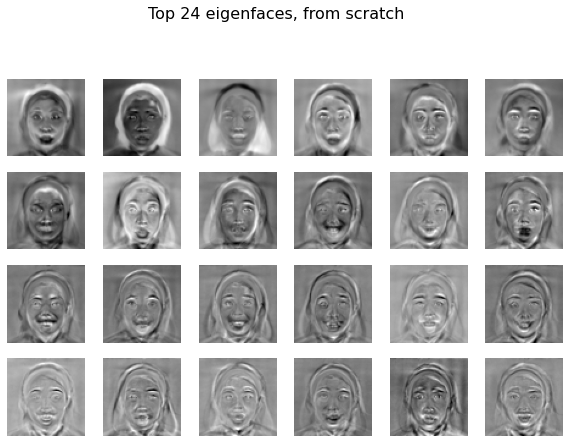

In [98]:
######## K=120 #########


flatten_images = np.zeros((N*N, M)) #(65536, 31)
for i in range(M):
    flatten_images[:,i] = images[:,:,i].flatten()
num_components = 120
components = u[:, :num_components]
projected_data = flatten_images.T @ components
reconstructed_data = (projected_data @ components.T).T

new_images = np.zeros((N,N,M))
for i in range(M):
    new_images[:,:,i] = reconstructed_data[:,i].reshape(N,N)
    
# Plot First 24 eigenfaces
fig = plt.figure(figsize=(10, 10))
for i in range(24):
    plt.subplot(6,6,i+1)
    plt.imshow(eigfaces[:,:,i],cmap = 'gray')
    plt.axis('off')
plt.suptitle('Top 24 eigenfaces, from scratch',size=16)

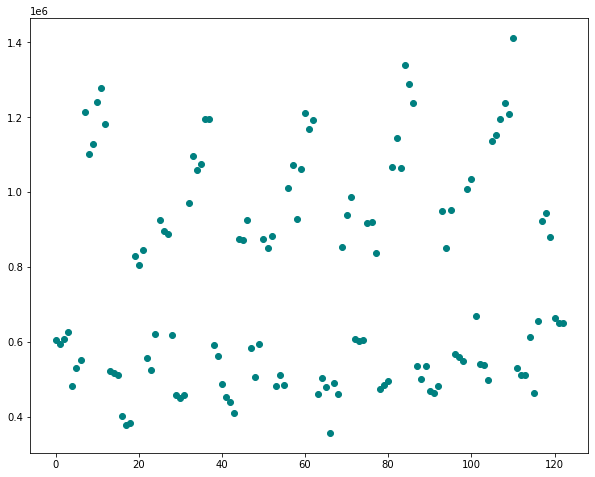

In [99]:
mse = []
for i in range(flatten_images.shape[1]):
    mse.append(mean_squared_error(flatten_images[:, i], reconstructed_data[:, i]))
plt.scatter(list(range(len(mse))), mse, marker='o', color='teal')
plt.show()    